<a href="https://colab.research.google.com/github/Sreeshbk/binance_datascience/blob/main/regression/E01_anscombes_quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anscombe's quartet

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough." It has been rendered as an actual musical quartet.

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

For all four datasets:

|Property |	Value	 | Accuracy |
|--------|--|--|
|Mean of x:	| 9	| exact
|Sample variance of x  : |	11 |	exact
|Mean of y	|7.50	|to 2 decimal places
|Sample variance of y  : |4.125 |	±0.003
|Correlation between x and y |	0.816	|to 3 decimal places
|Linear regression line	 | y= 3.00 + 0.500x	| to 2 and 3 decimal places, respectively
|Coefficient of determination of the linear regression  :|	0.67|	to 2 decimal places

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anscombe = sns.load_dataset("anscombe")

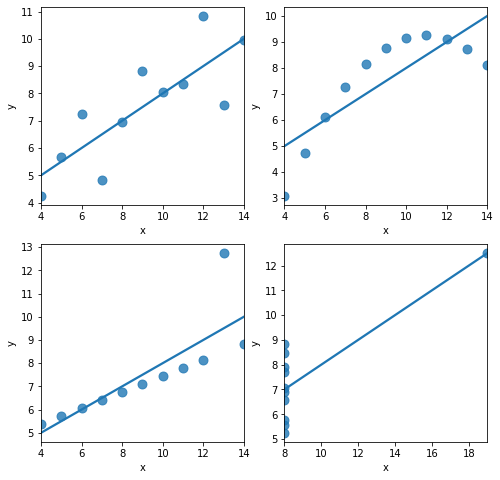

In [3]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2,nrows=2, sharey=False,figsize=(8,8))
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80},ax=ax1);
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80},ax=ax2);
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80},ax=ax3);
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),
           ci=None, scatter_kws={"s": 80},ax=ax4);

**The simple linear regression model may not appropriate for some kinds of datasets.** The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences.

- The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated where y could be modelled as gaussian with mean linearly dependent on x.
- The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
- In the third graph (bottom left), the distribution is linear, but should have a different regression line (a robust regression would have been called for). The calculated regression is offset by the one outlier which exerts enough influence to lower the correlation coefficient from 1 to 0.816.
- Finally, the fourth graph (bottom right) shows an example when one high-leverage point is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

# dataset = 'I' - Residual Error

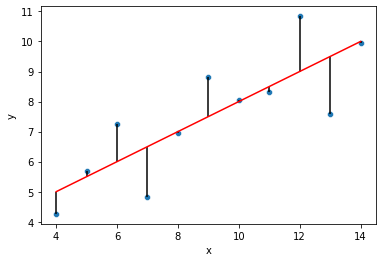

In [4]:
# y = 3.00 + 0.500x
quartet1 =anscombe.query("dataset == 'I'").copy()
quartet1['pred_y'] = 3 + 0.5 * quartet1['x']
quartet1['residual'] = quartet1['y'] - quartet1['pred_y']

sns.scatterplot(data=quartet1,x='x',y='y')
sns.lineplot(data=quartet1,x='x',y='pred_y',color='red')
plt.vlines(quartet1['x'],quartet1['y'],quartet1['y']-quartet1['residual'])

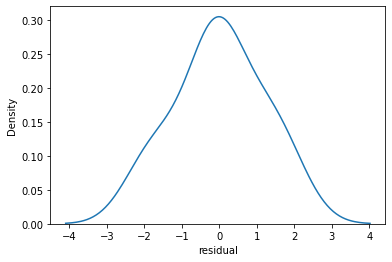

In [5]:
sns.kdeplot(quartet1['residual'])

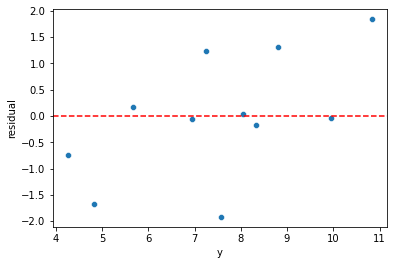

In [6]:
sns.scatterplot(data=quartet1,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

# dataset = 'II' - Residual Error

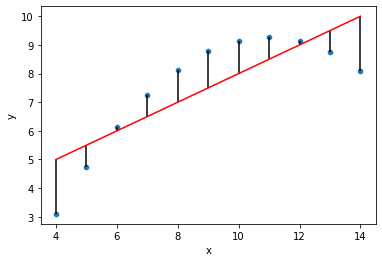

In [7]:
# y = 3.00 + 0.500x
quartet2 =anscombe.query("dataset == 'II'").copy()
quartet2['pred_y'] = 3 + 0.5 * quartet2['x']
quartet2['residual'] = quartet2['y'] - quartet2['pred_y']

sns.scatterplot(data=quartet2,x='x',y='y')
sns.lineplot(data=quartet2,x='x',y='pred_y',color='red')
plt.vlines(quartet2['x'],quartet2['y'],quartet2['y']-quartet2['residual'])

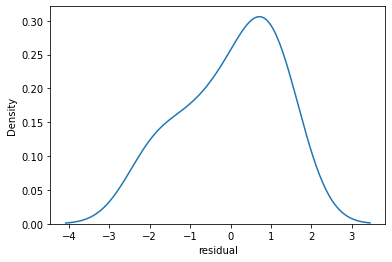

In [8]:
sns.kdeplot(quartet2['residual'])

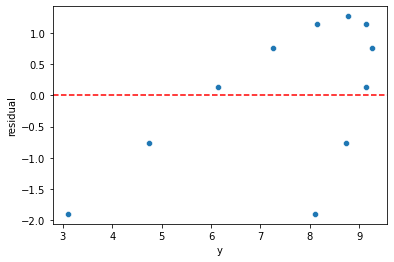

In [9]:
sns.scatterplot(data=quartet2,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

# dataset = 'III' - Residual Error

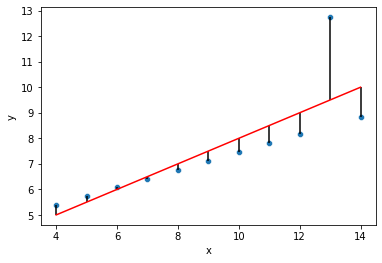

In [10]:
# y = 3.00 + 0.500x
quartet3 =anscombe.query("dataset == 'III'").copy()
quartet3['pred_y'] = 3 + 0.5 * quartet3['x']
quartet3['residual'] = quartet3['y'] - quartet3['pred_y']

sns.scatterplot(data=quartet3,x='x',y='y')
sns.lineplot(data=quartet3,x='x',y='pred_y',color='red')
plt.vlines(quartet3['x'],quartet3['y'],quartet3['y']-quartet3['residual'])

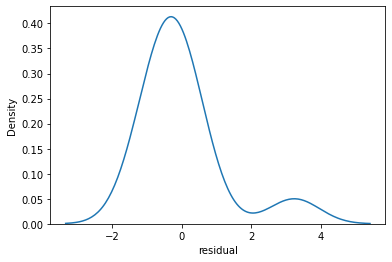

In [11]:
sns.kdeplot(quartet3['residual'])

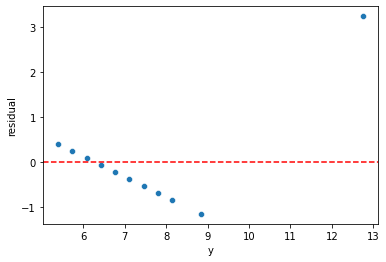

In [12]:
sns.scatterplot(data=quartet3,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

# dataset = 'IV' - Residual Error

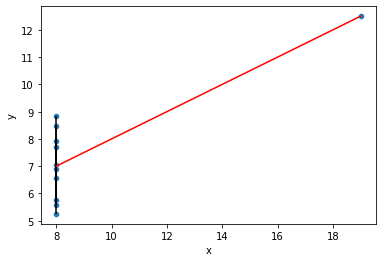

In [13]:
# y = 3.00 + 0.500x
quartet4 =anscombe.query("dataset == 'IV'").copy()
quartet4['pred_y'] = 3 + 0.5 * quartet4['x']
quartet4['residual'] = quartet4['y'] - quartet4['pred_y']

sns.scatterplot(data=quartet4,x='x',y='y')
sns.lineplot(data=quartet4,x='x',y='pred_y',color='red')
plt.vlines(quartet4['x'],quartet4['y'],quartet4['y']-quartet4['residual'])

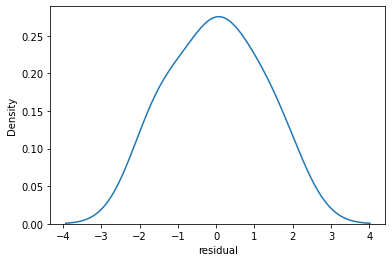

In [14]:
sns.kdeplot(quartet4['residual'])

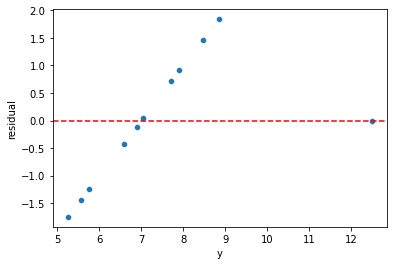

In [15]:
sns.scatterplot(data=quartet4,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

**All the residual plot indicates Linear Regression is not valid**, so always visualize the data while applying Linear Regression